In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib widget
import os
import sys
import importlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import math_functions as mf
import tools
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

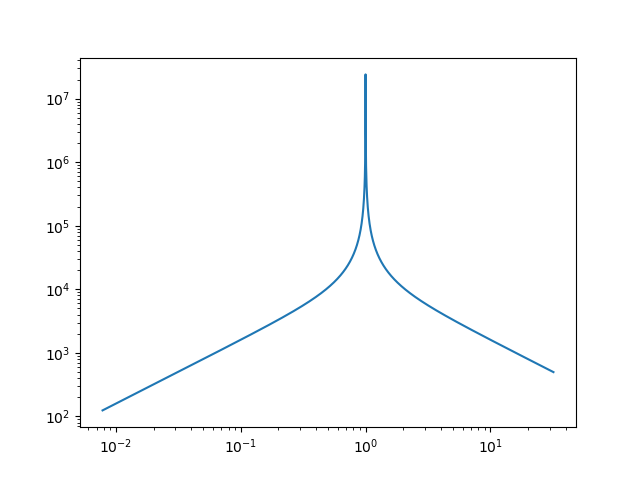

In [124]:
resonance = 1
L = 0.00001
C = 1/(resonance**2 * L * (2 * np.pi)**2)

R = 100000000000


f = np.linspace(0.0078125, 32, 10000)
w = 2 * np.pi * f

A = mf.RLC_transfer(w, R, L, C)

plt.figure()
plt.loglog(f, A)



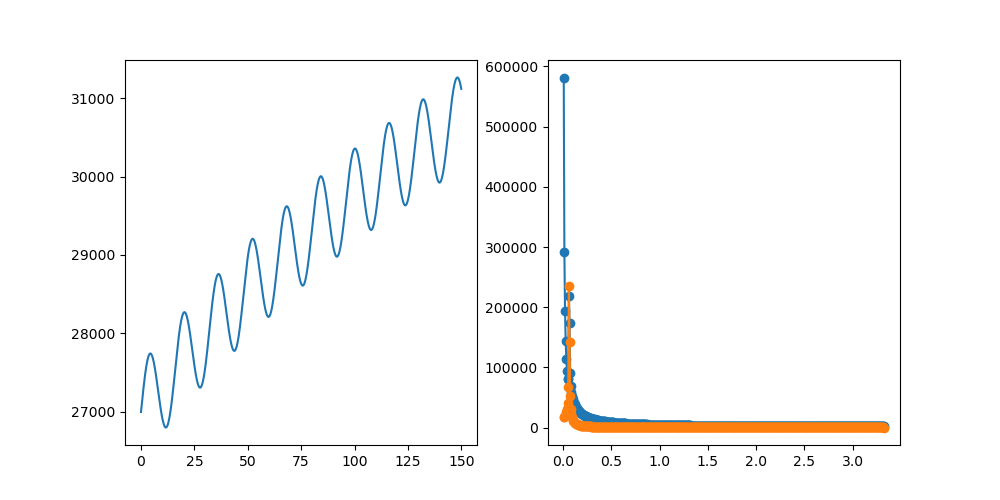

In [9]:
def exp_saturation(x, A, B, C):
    return A * (1 - np.exp(-(x/B))) + C


t = np.linspace(0, 150, 1000)
y = exp_saturation(t, 7000, 200, 27000) +   600 * np.sin(2* np.pi*(0.0625 * t))

F, A, P = tools.FFT(t, y)
F2, A2, P2 = tools.FFT(t, 600 * np.sin(2* np.pi*(0.0625 * t)))

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(t, y)
ax[1].plot(F, A, 'o-')
ax[1].plot(F2, A2, 'o-')


In [48]:
def RC_response(frequency, t, R, C, offset=0.5, amplitude=0.5):
    # Define the initial voltage across the capacitor
    v_c0 = 0
    
    dt = t[1] - t[0]

    # Define the input and output waveforms
    v_c = np.zeros_like(t)
    v_c[0] = v_c0
    w = 2 * np.pi * frequency # Angular frequency in rad/s
    i_in = offset + amplitude*np.cos(w*t)
    for i in range(1, len(t)):
        v_c[i] = v_c[i-1] + (i_in[i] / C - v_c[i-1] / (R * C)) * dt
    
    return i_in, v_c

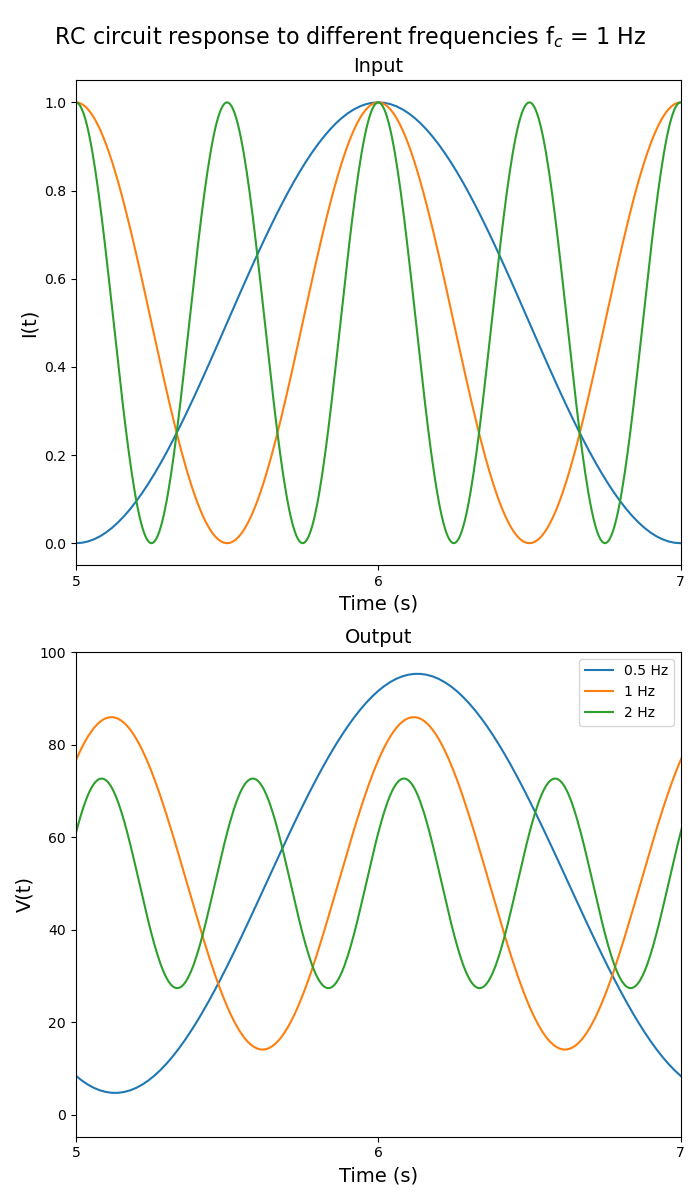

In [125]:
fc = 1
R = 100
C = 1/(2*np.pi*fc*R)

frequency_list = [0.5, 1, 2]

I_list = []
v_list = []
t_list = []
t_end = 30
t_start = 5
t_stop = 7

fig, ax = plt.subplots(2, 1, figsize = (7, 12))
fig.suptitle('RC circuit response to different frequencies f$_c$ = 1 Hz', fontsize = 16)
for i in frequency_list:
    t = np.arange(0, t_end, 1/(100*i))
    I, v = RC_response(i, t, R, C, 0.5, 0.5)
    I_list.append(I)
    v_list.append(v)
    t_list.append(t)
    ax[0].plot(t, I, label = f'{i} Hz')
    ax[0].set_xlabel('Time (s)', fontsize = 14)
    ax[0].set_ylabel('I(t)', fontsize = 14)
    ax[0].set_title('Input', fontsize = 14)
    ax[0].set_xlim([t_start,t_stop])
    ax[0].set_xticks(np.arange(t_start, t_stop + 1, 1))
    ax[0].set_xticklabels(np.arange(t_start, t_stop + 1, 1))
    #ax[0].legend()
    ax[1].plot(t, v, label = f'{i} Hz')
    ax[1].set_xlabel('Time (s)', fontsize = 14)
    ax[1].set_ylabel('V(t)', fontsize = 14)
    ax[1].set_title('Output', fontsize = 14)
    ax[1].set_xlim([t_start,t_stop])
    ax[1].set_xticks(np.arange(t_start, t_stop + 1, 1))
    ax[1].set_xticklabels(np.arange(t_start, t_stop + 1, 1))
    ax[1].legend()
    fig.tight_layout()
    
    fig.savefig('C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/Lab meetings/ressources/RC_circuit_response.png', dpi = 300)

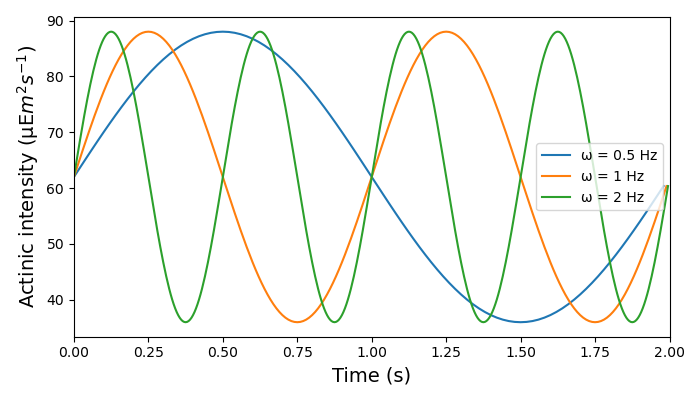

In [137]:
frequency_list = [0.5, 1, 2]

I_list = []
v_list = []
t_list = []
t_end = 2
t_start = 0
t_stop = 2

fig, ax = plt.subplots(1, 1, figsize = (7, 4))
for i in frequency_list:
    t = np.arange(0, t_end, 1/(100*i))
    I = 62 + 26*np.sin(2*np.pi*i*t)
    I_list.append(I)
    t_list.append(t)
    ax.plot(t, I, label = f'ω = {i} Hz')
    ax.set_xlabel('Time (s)', fontsize = 14)
    ax.set_ylabel('Actinic intensity (µE$m^{2}s^{-1}$)', fontsize = 14)
    ax.set_xlim([t_start,t_stop])
    ax.legend()
    fig.tight_layout()
    #ax.set_xticks(np.arange(t_start, t_stop + 1, 1))
    #ax.set_xticklabels(np.arange(t_start, t_stop + 1, 1))